In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


In [6]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

## Assets Clustering by Usage

In [7]:
use_group = usage.groupby("Asset")["Use"]
std_usages = use_group.std()
mean_usages = use_group.mean()

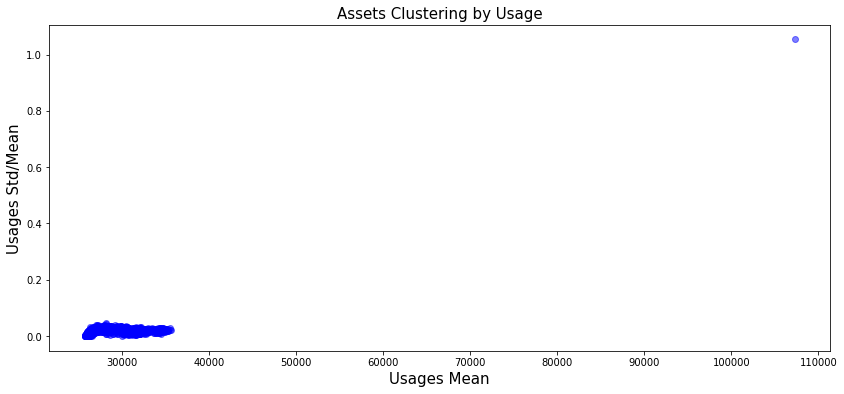

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(mean_usages, std_usages / mean_usages, "bo", alpha=0.5)
plt.title("Assets Clustering by Usage", fontsize=15)
plt.xlabel("Usages Mean", fontsize=15)
plt.ylabel("Usages Std/Mean", fontsize=15)
plt.show()

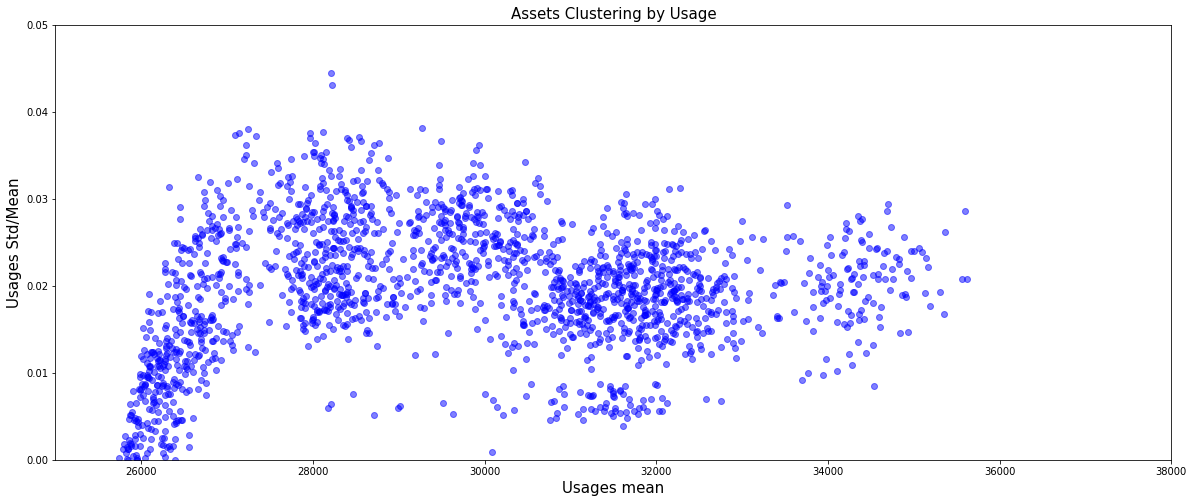

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(mean_usages, std_usages / mean_usages, "bo", alpha=0.5)
plt.ylim(0, 0.05)
plt.xlim(25000, 38000)
plt.title("Assets Clustering by Usage", fontsize=15)
plt.xlabel("Usages mean", fontsize=15)
plt.ylabel("Usages Std/Mean", fontsize=15)
plt.show()

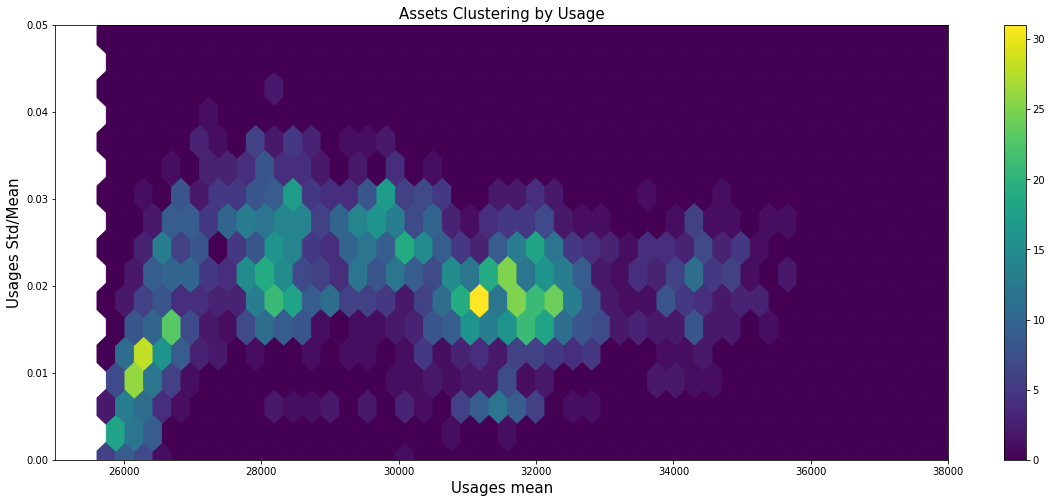

In [10]:
plt.figure(figsize=(20, 8))
hp = plt.hexbin(mean_usages, std_usages / mean_usages, gridsize=300)
plt.ylim(0, 0.05)
plt.xlim(25000, 38000)
plt.title("Assets Clustering by Usage", fontsize=15)
plt.xlabel("Usages mean", fontsize=15)
plt.ylabel("Usages Std/Mean", fontsize=15)
plt.colorbar(hp)
plt.show()

## Assets Clustering by Failures

In [11]:
time_group = failures.groupby("Asset")["Time"]
std_times = time_group.std()
mean_times = time_group.mean()

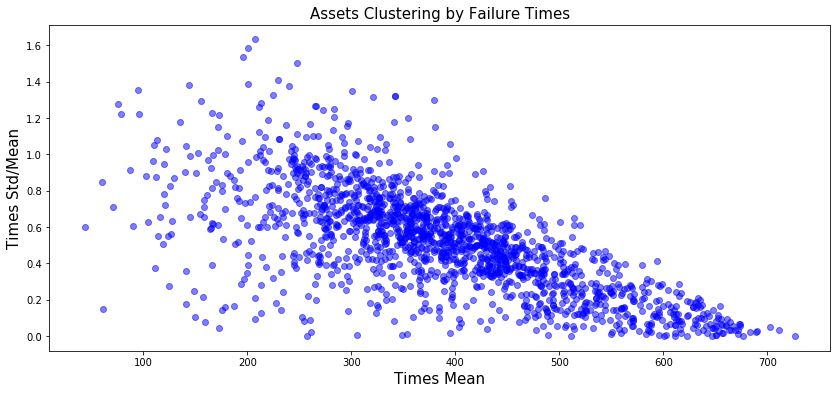

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(mean_times, std_times / mean_times, "bo", alpha=0.5)
plt.title("Assets Clustering by Failure Times", fontsize=15)
plt.xlabel("Times Mean", fontsize=15)
plt.ylabel("Times Std/Mean", fontsize=15)
plt.show()

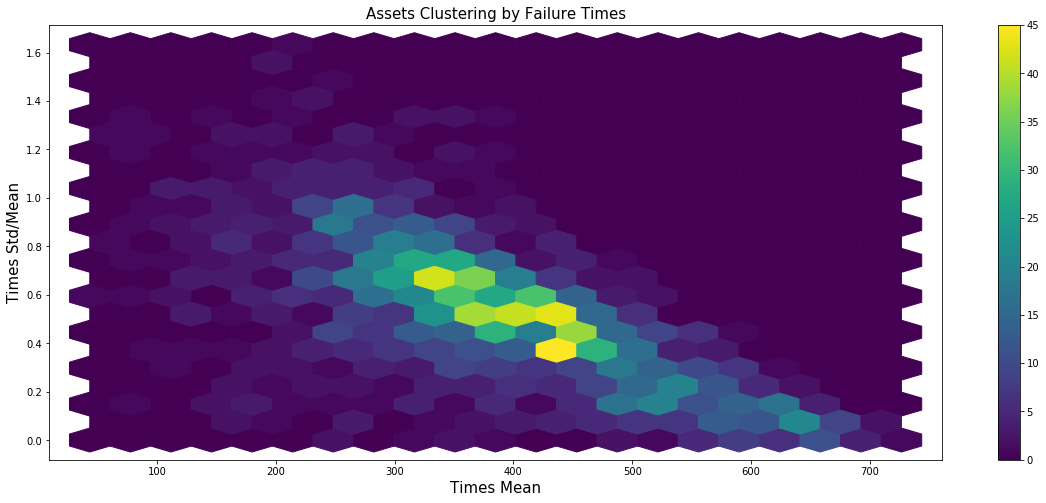

In [13]:
plt.figure(figsize=(20, 8))
hp = plt.hexbin(mean_times, std_times / mean_times, gridsize=20)
plt.title("Assets Clustering by Failure Times", fontsize=15)
plt.xlabel("Times Mean", fontsize=15)
plt.ylabel("Times Std/Mean", fontsize=15)
plt.colorbar(hp)
plt.show()

## Parts Clustering by Consumption Times

In [14]:
parts_group = consumption.groupby("Part")["Time"]
std_parts = parts_group.std()
mean_parts = parts_group.mean()

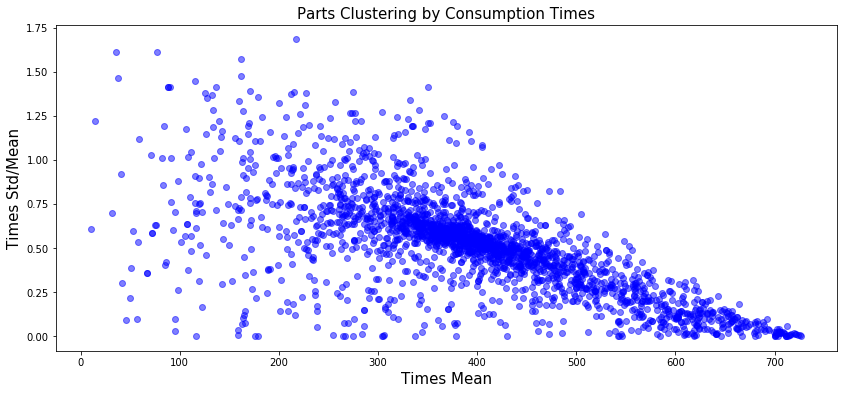

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(mean_parts, std_parts / mean_parts, "bo", alpha=0.5)
plt.title("Parts Clustering by Consumption Times", fontsize=15)
plt.xlabel("Times Mean", fontsize=15)
plt.ylabel("Times Std/Mean", fontsize=15)
plt.show()

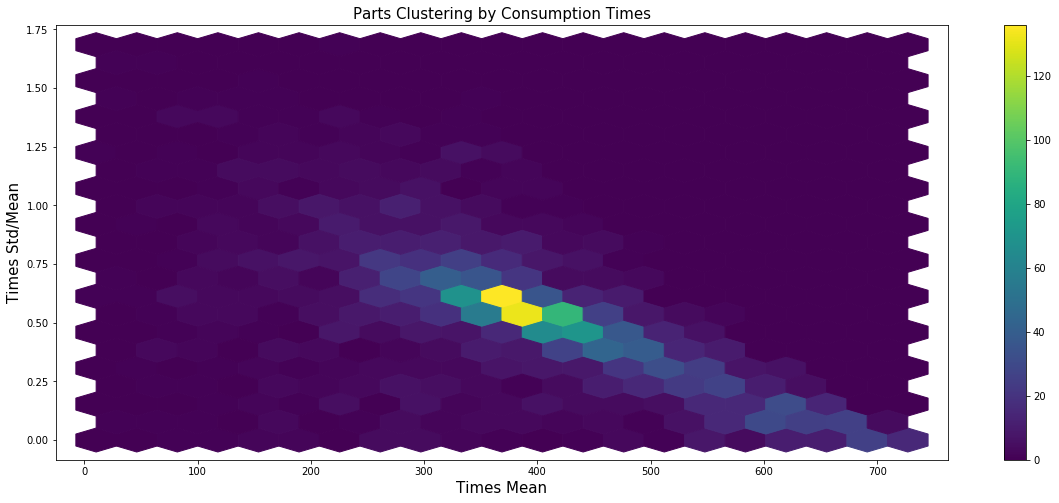

In [16]:
plt.figure(figsize=(20, 8))
hp = plt.hexbin(mean_parts, std_parts / mean_parts, gridsize=20)
plt.title("Parts Clustering by Consumption Times", fontsize=15)
plt.xlabel("Times Mean", fontsize=15)
plt.ylabel("Times Std/Mean", fontsize=15)
plt.colorbar(hp)
plt.show()